In [73]:
%matplotlib inline
import numpy as np
import xbpch as xb
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [39]:
#rundir = '../geosfp_4x5_standard/'
rundir = '../geosfp_025x03125_tropchem_na/'

datadir = rundir+'OutputDir/'
#timestr = '20130630'
timestr = '20130701'

ds1_raw = xb.open_bpchdataset(datadir+'std_ts'+timestr+'.bpch',
                          tracerinfo_file=rundir+'tracerinfo.dat',
                          diaginfo_file=rundir+'diaginfo.dat')

ds2_raw = xb.open_bpchdataset(datadir+'flexgrid_ts'+timestr+'.bpch',
                          tracerinfo_file=rundir+'tracerinfo.dat',
                          diaginfo_file=rundir+'diaginfo.dat')

# Get a sub-array of the same size
ds1 = ds1_raw.isel(time=slice(0,18))
ds2 = ds2_raw.isel(time=slice(0,18))

In [40]:
# Inspect data variables
ds2.data_vars

Data variables:
    IJ_AVG_S_NO     (time, lon, lat, lev) float32 0.00451004 0.00195315 ...
    time_bnds       (time, nv) datetime64[ns] 2013-07-01T01:00:00 ...
    IJ_AVG_S_O3     (time, lon, lat, lev) float32 12.0804 12.0903 12.0943 ...
    IJ_AVG_S_CO     (time, lon, lat, lev) float32 69.2197 69.1959 69.1932 ...
    TIME_SER_ODCOL  (time, lon, lat) float32 131.556 126.5 99.4181 63.6494 ...
    DAO_3D_S_UWND   (time, lon, lat, lev) float32 0.0845237 0.0628664 ...
    DAO_3D_S_TMPU   (time, lon, lat, lev) float32 299.186 297.847 296.602 ...

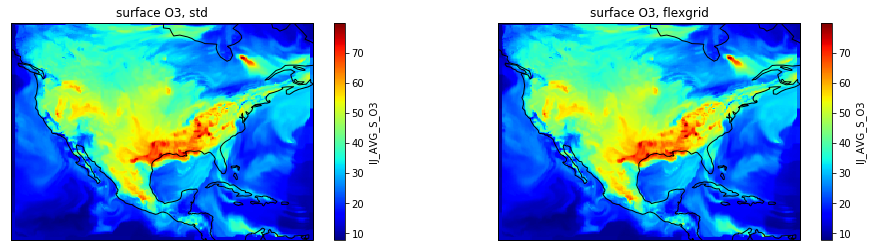

In [75]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree(), aspect='auto')
ds1["IJ_AVG_S_O3"].isel(time=17,lev=0).plot.imshow(x='lon',y='lat',
                                             ax=ax1, transform=ccrs.PlateCarree(),
                                             cmap='jet')
ax1.coastlines()
ax1.set_title('surface O3, std')

ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree(), aspect='auto')
ds2["IJ_AVG_S_O3"].isel(time=17,lev=0).plot.imshow(x='lon',y='lat',
                                             ax=ax2, transform=ccrs.PlateCarree(),
                                             cmap='jet')
ax2.coastlines()
ax2.set_title('surface O3, flexgrid')

In [77]:

def level_mean(dr):
    # dr: data array
    return dr.isel(lev=40).mean(dim=["lon","lat"]).values

def rdiff(a,b):
    return (a-b)/b

print(rdiff(surf_mean(ds1["DAO_3D_S_UWND"]),surf_mean(ds2["DAO_3D_S_UWND"])).max(),
      rdiff(surf_mean(ds1["DAO_3D_S_TMPU"]),surf_mean(ds2["DAO_3D_S_TMPU"])).max(),
      rdiff(surf_mean(ds1["IJ_AVG_S_NO"]),surf_mean(ds2["IJ_AVG_S_NO"])).max(),
      rdiff(surf_mean(ds1["IJ_AVG_S_O3"]),surf_mean(ds2["IJ_AVG_S_O3"])).max() )

1.2031e-07 1.33293e-07 0.0 0.0


In [87]:
# make sure results are identical
def absdiff(varname,lev=0,ds1=ds1,ds2=ds2):
    return np.abs((ds1[varname]-ds2[varname]).isel(lev=lev).values)

levlist = [0,20,30,40]
varlist = ["IJ_AVG_S_O3","IJ_AVG_S_NO","IJ_AVG_S_CO","DAO_3D_S_UWND","DAO_3D_S_TMPU"]

for var in varlist:
    print("Error for",var)
    for lev in levlist:
        temp = absdiff(var,lev=lev)
        print("At level",lev,": mean error=",temp.mean(),";max error=",temp.max())

Error for IJ_AVG_S_O3
At level 0 : mean error= 0.00115824 ;max error= 1.28703
At level 20 : mean error= 0.000127452 ;max error= 0.0828781
At level 30 : mean error= 8.20071e-06 ;max error= 0.00753784
At level 40 : mean error= 0.000102833 ;max error= 0.0791016
Error for IJ_AVG_S_NO
At level 0 : mean error= 9.27521e-05 ;max error= 0.576252
At level 20 : mean error= 5.16022e-06 ;max error= 0.00273711
At level 30 : mean error= 3.23413e-06 ;max error= 0.00446191
At level 40 : mean error= 8.22429e-09 ;max error= 2.38419e-07
Error for IJ_AVG_S_CO
At level 0 : mean error= 2.51086e-05 ;max error= 0.011795
At level 20 : mean error= 2.88011e-05 ;max error= 0.0185242
At level 30 : mean error= 4.11682e-06 ;max error= 0.00861359
At level 40 : mean error= 2.01308e-07 ;max error= 0.000339508
Error for DAO_3D_S_UWND
At level 0 : mean error= 0.0 ;max error= 0.0
At level 20 : mean error= 0.0 ;max error= 0.0
At level 30 : mean error= 0.0 ;max error= 0.0
At level 40 : mean error= 4.67003e-07 ;max error= 3.8